In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

## Problem Statement

## Data Gathering 

In [2]:
df = pd.read_csv("medical_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Exploratory Data Analysys

In [3]:
df.shape

(1338, 7)

#### 1. Missing Values 

In [4]:
df.isna().sum()    

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 1.Sex

In [6]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [7]:
df["sex"].nunique()

2

In [8]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [9]:
df["sex"].replace({"male":0,"female":1},inplace=True)
sex_dict = {"male":0,"female":1}
sex_dict

{'male': 0, 'female': 1}

### smoker

In [10]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [11]:
df["smoker"].replace({"no":0,"yes":1},inplace=True)
smoker_dict = {"no":0,"yes":1}
smoker_dict

{'no': 0, 'yes': 1}

### region

In [12]:
df["region"].value_counts()
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


In [13]:
df = pd.get_dummies(df,columns=["region"])
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0,1,0,0
1334,18,1,31.920,0,0,2205.98080,1,0,0,0
1335,18,1,36.850,0,0,1629.83350,0,0,1,0
1336,21,1,25.800,0,0,2007.94500,0,0,0,1


In [14]:
df.isna().mean()*100

age                 0.0
sex                 0.0
bmi                 0.0
children            0.0
smoker              0.0
charges             0.0
region_northeast    0.0
region_northwest    0.0
region_southeast    0.0
region_southwest    0.0
dtype: float64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   uint8  
 7   region_northwest  1338 non-null   uint8  
 8   region_southeast  1338 non-null   uint8  
 9   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


In [16]:
df.describe()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,13270.422265,0.242152,0.242900,0.272048,0.242900
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237,0.428546,0.428995,0.445181,0.428995
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,30.400000,1.000000,0.000000,9382.033000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515,0.000000,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000,1.000000


In [17]:
df.corr()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.057292,0.002425,0.011156,-0.017117,0.004184
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,-0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
region_northeast,0.002475,0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,-0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


<AxesSubplot:>

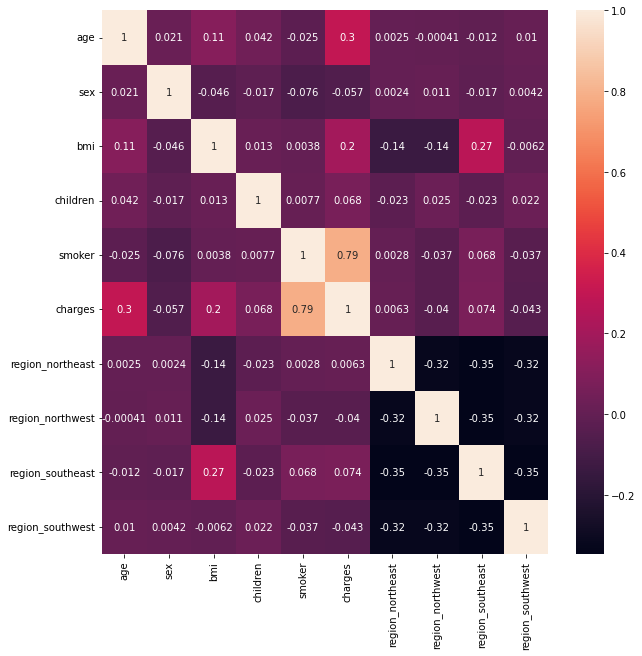

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

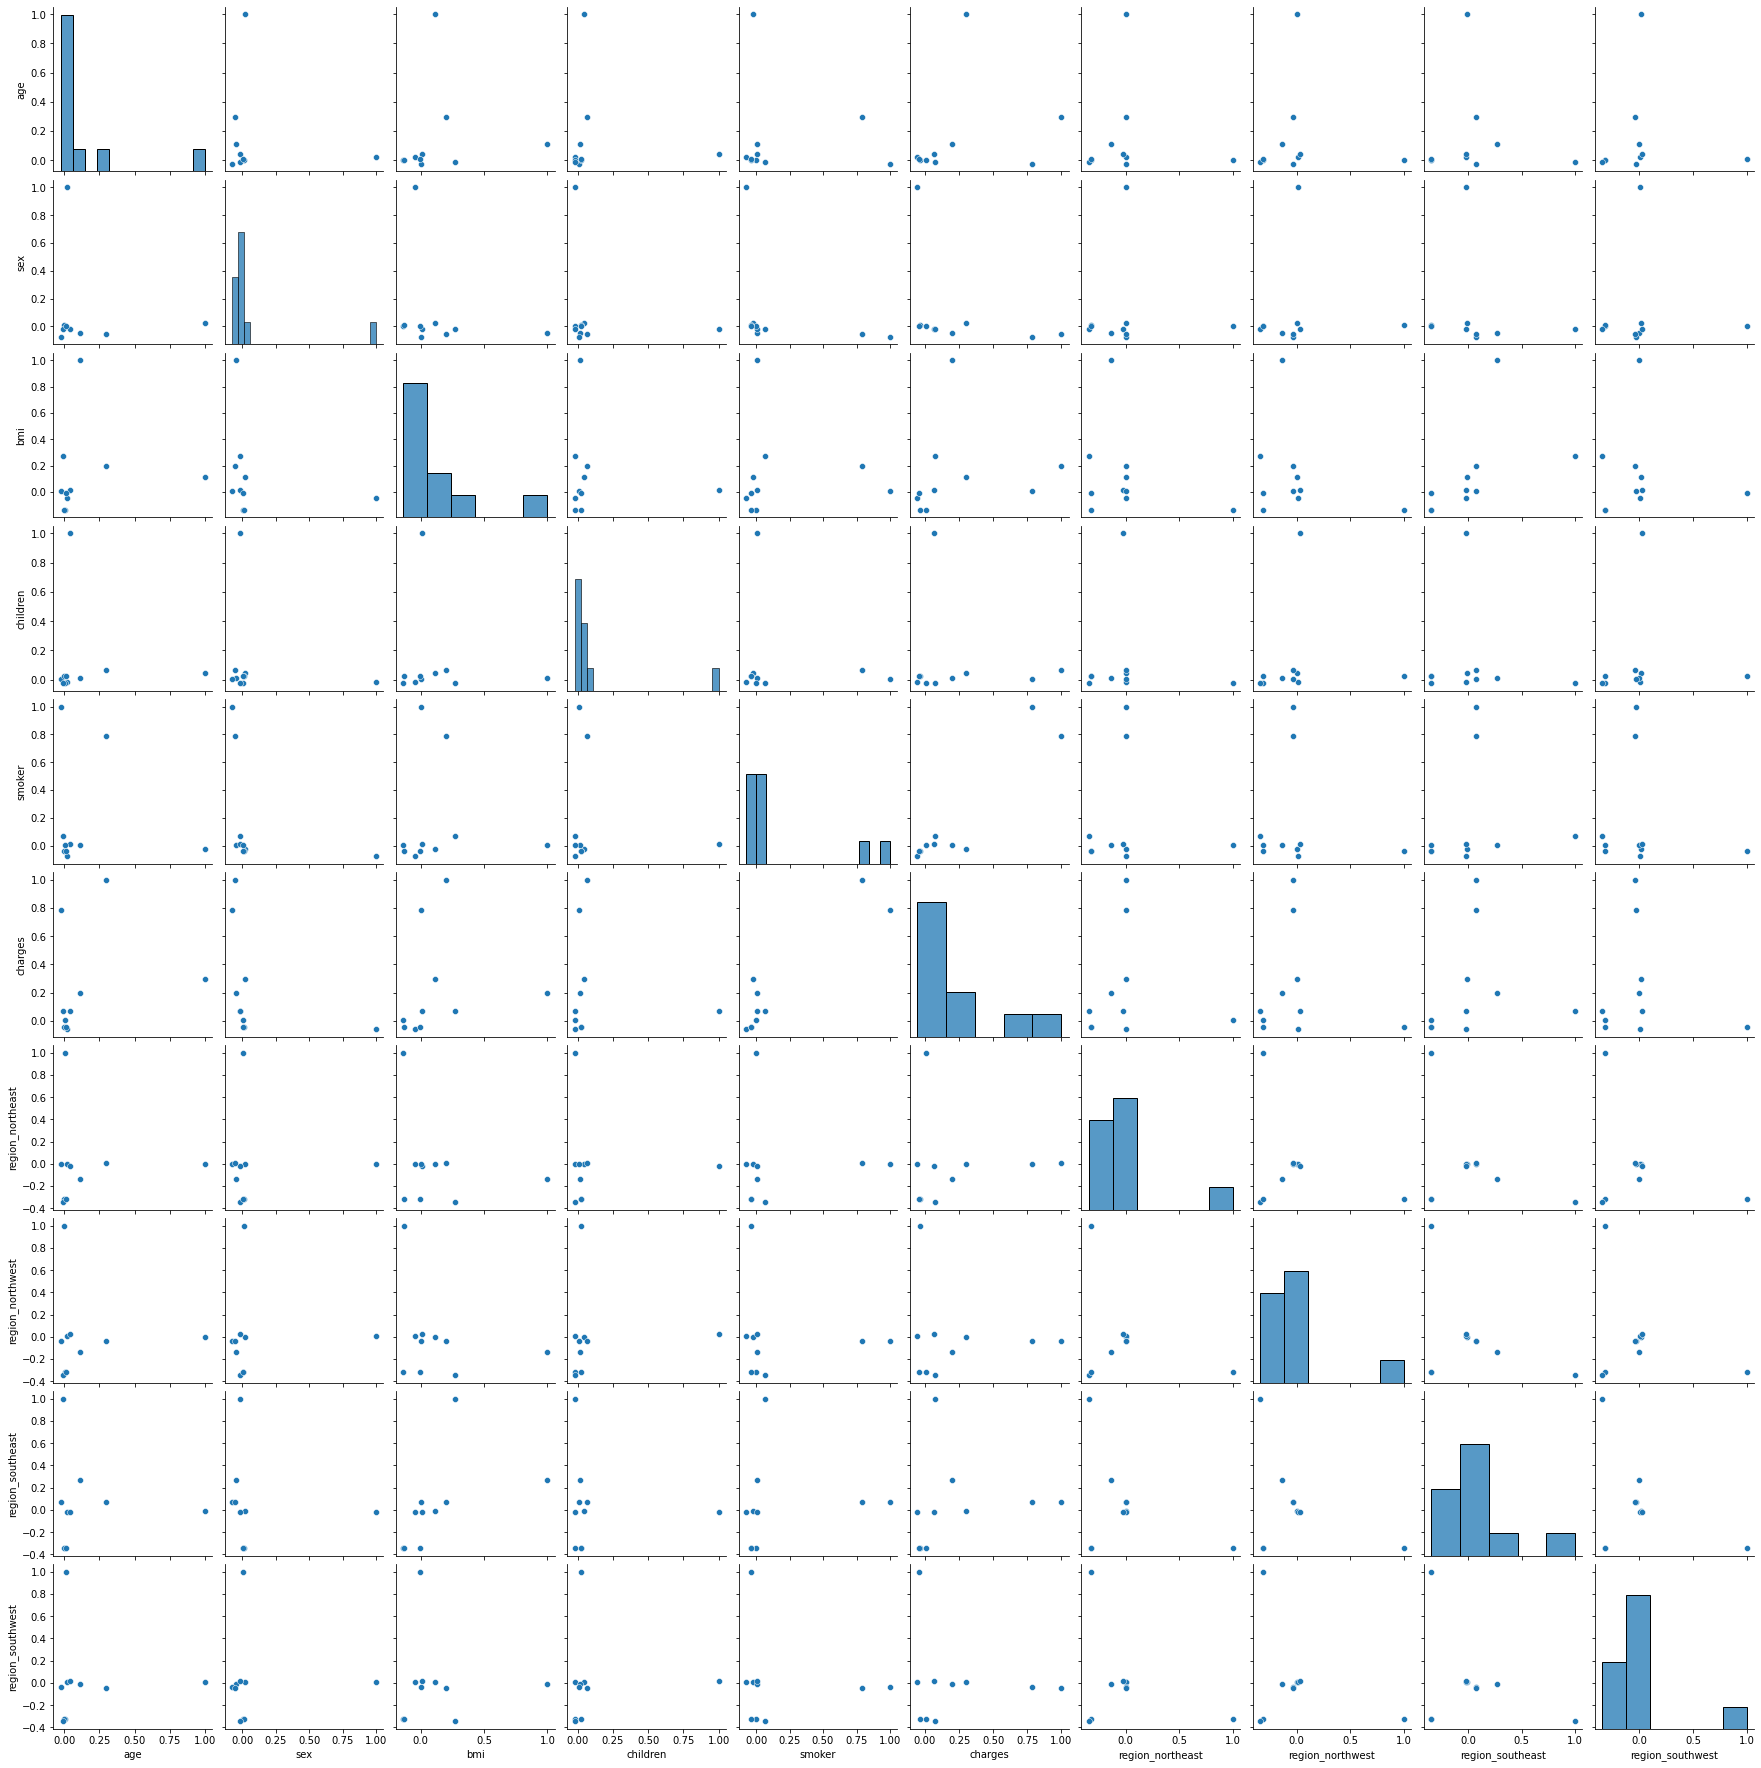

In [19]:
sns.pairplot(df.corr())

<AxesSubplot:>

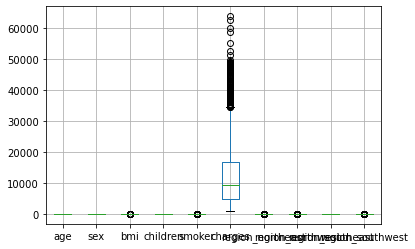

In [20]:
df.boxplot()

In [21]:
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0,1,0,0
1334,18,1,31.920,0,0,2205.98080,1,0,0,0
1335,18,1,36.850,0,0,1629.83350,0,0,1,0
1336,21,1,25.800,0,0,2007.94500,0,0,0,1


#### Split train and test data 

In [22]:
x = df.drop("charges",axis=1)
y = df["charges"]

In [23]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [24]:
model = LinearRegression()
model

LinearRegression()

In [25]:
model.fit(x_train,y_train)

LinearRegression()

### Model Evaluation

In [26]:
y_pred = model.predict(x_test)
y_pred[:5]

array([ 8662.89282368,  6261.49430899, 15331.32709195, 11299.02497638,
        4104.16941974])

In [27]:
y_test[:5]

7        7281.50560
999      5267.81815
1209    12347.17200
491     24513.09126
625      3736.46470
Name: charges, dtype: float64

In [28]:
# Testing Dataset
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print("R Squared :",r2)

MSE : 36800107.88801568
RMSE : 6066.309247641079
MAE : 4226.647664219919
R Squared : 0.7166124432331717


In [29]:
# training Data Set
y_pred_train = model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train, y_pred_train)
print("R Squared :",r2)

MSE : 36576361.89065711
RMSE : 6047.839439887364
MAE : 4175.618401731291
R Squared : 0.7618780003618578


#### Predict charges on the basis of single row 

In [30]:
print(sex_dict)
# print(region_dict)
print(smoker_dict)

{'male': 0, 'female': 1}
{'no': 0, 'yes': 1}


In [31]:
column_name = x.columns
len(column_name)

9

In [32]:
column_name

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [33]:
x.head(1).T

,0
age,19.0
sex,1.0
bmi,27.9
children,0.0
smoker,1.0
region_northeast,0.0
region_northwest,0.0
region_southeast,0.0
region_southwest,1.0


In [34]:
age = 19
sex = "male"
bmi = 27.9
children = 0
smoker = "no"

region = "southwest"
 

In [35]:
data = {"sex_dict":sex_dict,"smoker_dict":smoker_dict,
       "column_name":list(column_name)}
data

{'sex_dict': {'male': 0, 'female': 1},
 'smoker_dict': {'no': 0, 'yes': 1},
 'column_name': ['age',
  'sex',
  'bmi',
  'children',
  'smoker',
  'region_northeast',
  'region_northwest',
  'region_southeast',
  'region_southwest']}

In [36]:
region = "region_" + region
region

'region_southwest'

In [37]:
region_index = np.where(column_name == region)[0][0]
region_index

8

In [38]:
array = np.zeros(x.shape[1],dtype=int)
array

array([0, 0, 0, 0, 0, 0, 0, 0, 0])

In [39]:
array[0] = age
array[1] = data["sex_dict"][sex]
array[2] = bmi
array[3] = children
array[region_index] = 1


In [40]:
medical_charges = model.predict([array])[0]
medical_charges

606.7419758461037

In [41]:
import json

with open ("data.json","w")as f:
    json.dump(data,f)

In [42]:
import pickle

with open("Medical_model.pkl","wb")as f:
    pickle.dump(model,f)